<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 bis 2 - Trabajo colaborativo
#### Tomas A. Albanesi - Nicolas Pereyra


## Indice de contenidos:
* [Consigna](#consigna)
* [Punto 1](#punto1)
* [Punto 2](#punto2)
* [Punto 3](#punto3)
* [Punto 4](#punto4)
* [Punto 5](#punto5)
* [Conclusiones generales](#conclusiones)
* [Modalidad adoptada](#modalidad)
* [Analisis compartido de resultados](#compartido)

## 0. Consigna <a class="anchor" id="consigna"></a>

<img src="./img/ConsignaA.png" width="700" /> 

<img src="./img/ConsignaB.png" width="700" /> 

## 1. Obtener la plantilla de diseño normalizada del filtro pasa banda <a class="anchor" id="punto1"></a>

In [3]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/PlantillaNormalizadaPasabanda.pdf", width=1000, height=1000)

Donde se definen las siguientes frecuencias angulares:

Definiendo como norma de frecuencia a $f_0$ o frecuencia central: $\Omega_\omega = 2 \cdot \pi \cdot f_0 = 2 \cdot \pi \cdot 22k \frac{rad}{s}$

* $\omega_{0} = \frac{\omega_{0}}{\Omega_\omega} = 1$
* $\omega_{s_1} = \frac{\omega_{s_1}}{\Omega_\omega} = \frac{2 \cdot \pi \cdot 17k}{2 \cdot \pi \cdot 22k} = 0.773$
* $\omega_{s_2} = \frac{\omega_{s_2}}{\Omega_\omega} = \frac{2 \cdot \pi \cdot 36k}{2 \cdot \pi \cdot 22k} = 1.636$

## 2. Obtener la funcion transferencia normalizada del filtro pasa bajos prototipo <a class="anchor" id="punto2"></a>

#### En primer lugar determinamos el valor del ancho de banda (BW):

\begin{equation}
BW = \frac{\omega_0}{Q} = \frac{1}{5} = 0.2
\end{equation}

#### Aplicamos el kernel de transformacion para la conversion de parametros

\begin{equation}
K(s) = Q \cdot \frac{s^2 - 1}{s}
\end{equation}

Por lo tanto, las frecuencias angulares convertidas seran:

\begin{equation}
\Omega_{s_1} = Q \cdot \frac{\omega_{s_1}^2 - 1}{s} = 5 \cdot \frac{0.773^2 - 1}{0.773} = -2.6
\end{equation}

\begin{equation}
\Omega_{s_2} = Q \cdot \frac{\omega_{s_2}^2 - 1}{s} = 5 \cdot \frac{1.636^2 - 1}{1.636} = 5.123
\end{equation}

#### Calculo de $\epsilon$

\begin{equation}
\large
\epsilon^2 = 10^{\frac{\alpha_{max}}{10}} - 1 = 0.122
\end{equation}

#### Calculo de $n$ (orden) del filtro

Para calcular el orden del filtro debemos iterar en ambas frecuencias hasta encontrar aquel "n" que cumpla con ambos criterios solicitados:

\begin{equation}
\alpha_{{min}_n} = 10 \cdot log(1 + \epsilon^2 \cdot cosh^2(n \cdot cosh^{-1}(\Omega_s)))
\end{equation}

Por lo que a continuación, elaboramos una tabla con los distintos valores, los cuales fueron obtenidos mediante Python:

In [12]:
import numpy as np

Ws1 = 2.6
Ws2 = 5.123

ee = 0.122

for nn in range(1,5):
    
    # Calculo de atenuacion minima en db para chebyshev 
    alfa_min1_n = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(Ws1))**2)
    alfa_min2_n = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(Ws2))**2)
    
    # Muestro los resultados
    print( 'nn {:d} - alfa_min1_cheby {:f} - alfa_min2_cheby {:f}'.format(nn, alfa_min1_n, alfa_min2_n))

nn 1 - alfa_min1_cheby 2.611962 - alfa_min2_cheby 6.234463
nn 2 - alfa_min1_cheby 13.037046 - alfa_min2_cheby 25.111506
nn 3 - alfa_min1_cheby 26.790857 - alfa_min2_cheby 45.224560
nn 4 - alfa_min1_cheby 40.760985 - alfa_min2_cheby 65.351564


|  n  | $\Omega_{s_1}$           | $\Omega_{s_2}$                        |
|:---:|:------------------------:|:-------------------------------------:|
|  1  | $2.611962 dB$           | $6.234463 dB$   |
|  2  | $13.037046 dB$               | $25.111506 dB$       |
|  3  | $26.790857 dB $           | $45.224560 dB$                        |
|  4  | $40.760985 dB$           | $65.351564 dB$                        |

Como podemos observar con un orden $n = 3$ ya nos alcanza para cumplir con las dos restricciones.

#### Calculo de las frecuencias laterales de corte

Debido a que el ancho de banda $BW = 0.2$ normalizado, asumiendo que la frecuencia $f_0$ es central, podemos deducir que:

$\Omega_1 = \Omega_0 - \frac{BW}{2} = 0.9$

$\Omega_1 = \Omega_0 + \frac{BW}{2} = 1.1$

#### Obtencion de parametros de plantilla PASA BANDA a PASA BAJOS PROTOTIPO

| Pasa banda normalizado | Pasa bajos prototipo |
|:---:|:---:|
| $\omega_{p1}$, $\omega_{p2}$ | $\Omega_p = \frac{1}{\omega_p} = 1$ |
| $\omega_{s1}$, $\omega_{s2}$ | Elegir a $\Omega_s$ como la menor de $\Omega_{s1}$, $\Omega_{s2}$ |
| $\alpha_{max}$ | $\alpha_{max}$ |
| $\alpha_{min}$ | $\alpha_{min}$ |

En base a la tabla de conversion anterior, elegimos:

* $n = 3$
* $\Omega_p$ = 1
* $\Omega_s$ = 2.6

Por lo tanto, ahora comenzaremos con el diseño del filtro Chebyshev para los parametros mencionados anteriormente.


#### Diseño de filtro chebyshev

Teniamos que:

\begin{equation}
\large
|T_{C_3}| = \frac{1}{1 + \epsilon^2 \cdot C_3^2(\Omega)}
\end{equation}

Aplicando Python para la resolucion de forma numerica (diseñando un chebyshev de tercer orden):



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# Parametros
n = 3
alpha_max = 0.5
wp = 1

[z_lp, p_lp, k_lp] = sig.cheb1ap(n, alpha_max)
[num_lp, den_lp] = sig.zpk2tf(z_lp, p_lp, k_lp)

filter_lp = tf2sos_analog(num_lp, den_lp)

print_subtitle('Transferencia de filtro pasa bajo prototipo')
pretty_print_SOS(filter_lp)
print_subtitle('Transferencia de filtro pasa bajo prototipo, parametrizado en W y Q')
pretty_print_SOS(filter_lp, mode='omegayq')

#### Transferencia de filtro pasa bajo prototipo

<IPython.core.display.Math object>

#### Transferencia de filtro pasa bajo prototipo, parametrizado en W y Q

<IPython.core.display.Math object>

#### Graficos de transferencia PASA BAJO PROTOTIPO (NORMALIZADO)

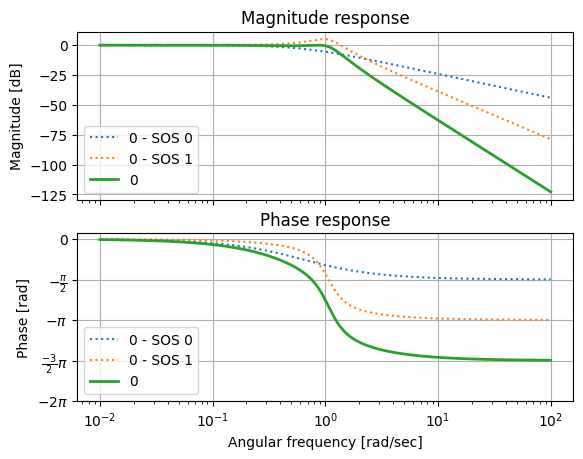

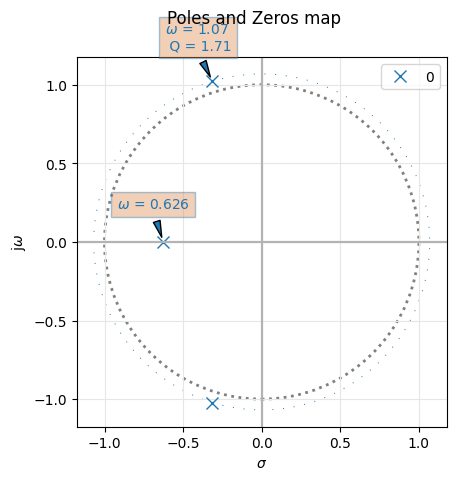

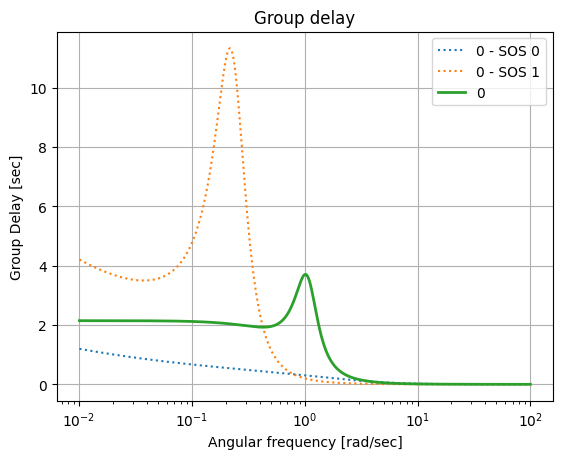

In [4]:
analyze_sys(filter_lp)

#### Graficos de transferencia PASA BAJO PROTOTIPO (NORMALIZADO) - Acercamiento a la zona ondulada

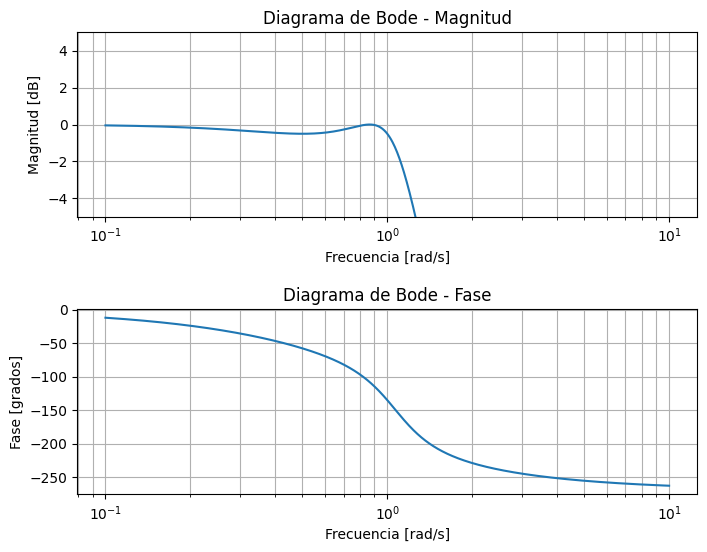

TransferFunctionContinuous(
array([0.71569379]),
array([1.        , 1.25291297, 1.53489546, 0.71569379]),
dt: None
)


In [10]:
#--------------------------------------------------------------
# Generar el grillado de frecuencias

## Pasa bajos
lpb, lpa = sig.cheby1(3, 0.5, 1, analog=True)

tflp = sig.TransferFunction(lpb,lpa)

# Crear un vector de frecuencias con mayor resolución
w = np.logspace(-1, 1, num=1000)  # Rango de 10^4 a 10^6 con 1000 puntos

# Calcular la respuesta en frecuencia del sistema
w, mag, phase = sig.bode(tflp, w)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Ajustar límites del eje y
ax1.set_ylim(-5,5)

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()
print(tflp)

## 3. Obtener la transferencia del filtro pasabanda <a class="anchor" id="punto3"></a>

Ahora, realizamos la conversion de pasa bajos a pasa banda y obtenemos la funcion transferencia, tambien con metodos numericos y Python:

In [19]:
# Parametros
n = 3
alpha_max = 0.5
wp = 1
bw = 0.2

[z_lp, p_lp, k_lp] = sig.cheb1ap(n, alpha_max)
[num_lp, den_lp] = sig.zpk2tf(z_lp, p_lp, k_lp)
num_bp, den_bp = sig.lp2bp(num_lp, den_lp, wo=wp, bw=bw)

filter_bp = tf2sos_analog(num_bp, den_bp)

print_subtitle('Transferencia de filtro pasa banda')
pretty_print_SOS(filter_bp)
print_subtitle('Transferencia de filtro pasa banda, parametrizado en W y Q')
pretty_print_SOS(filter_bp, mode='omegayq')

#### Transferencia de filtro pasa banda

<IPython.core.display.Math object>

#### Transferencia de filtro pasa banda, parametrizado en W y Q

<IPython.core.display.Math object>

#### Graficos de transferencia PASA BANDA (NORMALIZADO)

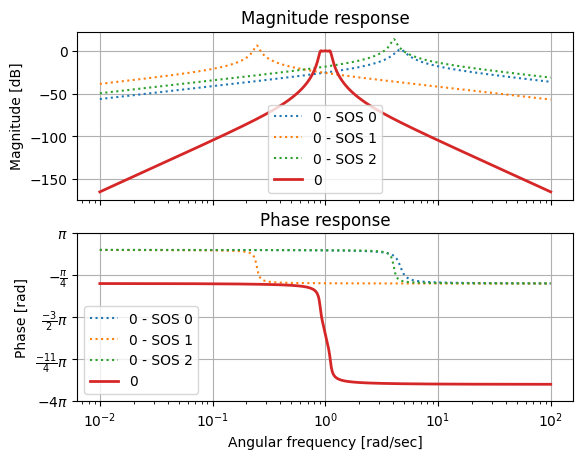

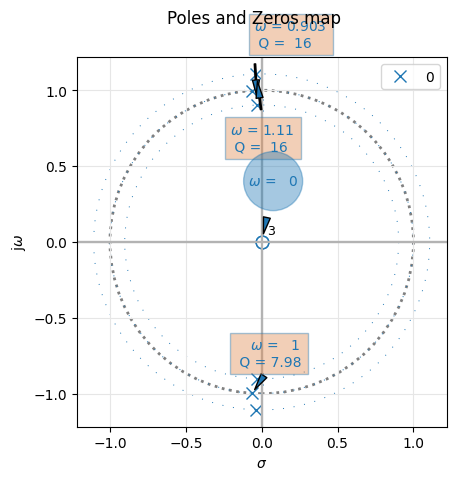

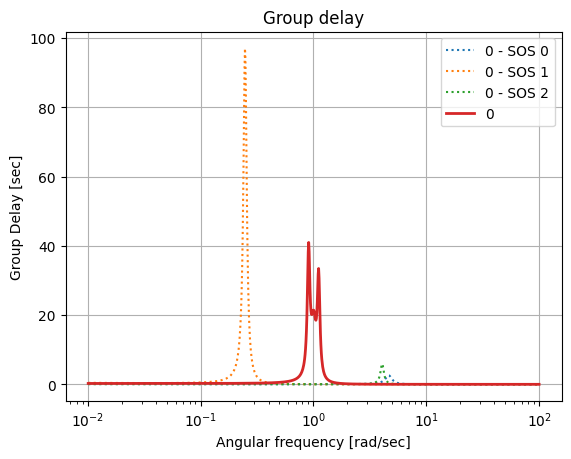

In [21]:
analyze_sys(filter_bp)

## 4. Implementar mediante estructuras pasivas separadas mediantes seguidores de tension <a class="anchor" id="punto4"></a>

La topologia o red pasiva que podemos utilizar para esto es la siguiente:
    
<img src="./img/RedPasiva.png" width="500" /> 

Esta red posee la siguiente transferencia:

\begin{equation}
T(s) = \frac{\frac{1}{RC} \cdot s}{s^2 + \frac{1}{RC} \cdot s + \frac{1}{LC}}
\end{equation}

En este caso, deberiamos colocar tres estructuras pasivas de este tipo, separadas por seguidores de tension activos, para poder formar la transferencia final.

<img src="./img/RedPasivaCompleta.png" width="700" /> 

Ahora, debemos determinar los valores de los componentes, mediante la comparacion con la transferencias:

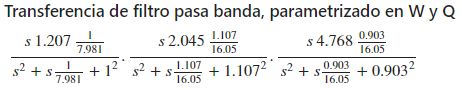

##### Con respecto a la primer transferencia:

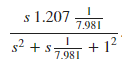

$\frac{1}{RC} = \frac{1}{7.981}$ y $\frac{1}{LC} = 1$

Como se puede observar el parametro en comun entre ambas ecuaciones es el capacitor, por lo tanto, nos conviene fijar el valor del capacitor y luego calcular el resto:

* $C_1 = 1$
* $L_1 = 1$
* $R_1 = 7.981$

##### Con respecto a la segunda transferencia:

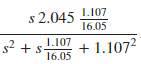

$\frac{1}{RC} = \frac{1.107}{16.05}$ y $\frac{1}{LC} = 1.107^2$

Como se puede observar el parametro en comun entre ambas ecuaciones es el capacitor, por lo tanto, nos conviene fijar el valor del capacitor y luego calcular el resto:

* $C_2 = 1$
* $L_2 = 0.816$
* $R_2 = 14.499$

##### Con respecto a la tercer transferencia:

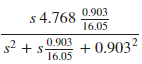

$\frac{1}{RC} = \frac{0.903}{16.05}$ y $\frac{1}{LC} = 0.903^2$

Como se puede observar el parametro en comun entre ambas ecuaciones es el capacitor, por lo tanto, nos conviene fijar el valor del capacitor y luego calcular el resto:

* $C_3 = 1$
* $L_3 = 1.226$
* $R_3 = 17.774$

Con los valores obtenidos realizo la simulacion en LTSpice:

Circuito:
<img src="./img/CircuitoPasivo.png" width="1000" /> 

Respuesta de modulo:
<img src="./img/Modulo.png" width="1000" /> 

Respuesta de modulo con cursores en bandas:
<img src="./img/ModuloCursores.png" width="1000" /> 

Respuesta de fase:
<img src="./img/Fase.png" width="1000" /> 


## 5. Activar los inductores mediante la red propuesta <a class="anchor" id="punto5"></a>

Realizaremos la activacion de los inductores mediante el siguiente circuito:

<img src="./img/CircuitoActivador.png" width="1000" /> 

$T(s) = \frac{s.\frac{2.a}{R.C}}{s²+s.\frac{1}{R.C}+\frac{1}{C².R_{gic}²}}$  
  
Para que la trasferencia del filtro acrtivo sea igual a la del filtro pasivo la amplificacion por la banda de paso tiene que ser $1$, por lo tanto $a$ debe ser $\frac{1}{2}$. Ademas de esta concideracion debemos colocar los filtros en cascada y dado que la salida del circuito es un la salida de un opamp no es necesario utilizar un buffer para el colocamiento en cascada.

### Eleccion de componentes:
Concideramos a todos los capacitores con igual capacidad y todas las resistencias dentro de cada gic del mismo valor.

#### Normalizados:
$C = 1F$  
$R_b = R_c  \Rightarrow$ esto es necesario para que $a = 1/2$  
$R_{b1} = 16 \Omega$  
$R_{b2} = 30 \Omega$  
$R_{b3} = 35 \Omega$  
$R_{gic1} = 1 \Omega$  
$R_{gic2} = 0.903 \Omega$  
$R_{gic3} = 1.107 \Omega$  



<img src="./img/CircuitoCompletoActivado.png" width="1000" /> 

<img src="./img/SimulacionActivadoNormalizado.png" width="1000" /> 

#### Desnormalizados:
$C = 72.34 nF$  
$R_b = R_c  \Rightarrow$ esto es necesario para que $a = 1/2$  
$R_{b1} = 16k \Omega$  
$R_{b2} = 30k \Omega$  
$R_{b3} = 35k \Omega$  
$R_{gic1} = 1k \Omega$  
$R_{gic2} = 903 \Omega$  
$R_{gic3} = 1.107k \Omega$  

<img src="./img/CircuitoCompletoActivadoDesnormalizado.png" width="1000" /> 

<img src="./img/SimulacionActivadoDesnormalizado.png" width="1000" /> 

## Conclusiones generales <a class="anchor" id="conclusiones"></a>

Como se puede observar, en el caso de la implementacion pasiva, como no podemos tener ganancia mayores a 1, la respuesta en modulo nos queda desplazada hacia abajo. En el caso de la implementacion activa nos queda de la forma correcta, como se puede observar en los graficos.

Ademas, pudimos realizar correctamente los calculos y luego, comprobarlo tanto con las simulaciones numericas realizadas en Python como las simulaciones realizadas en LTSpice.

## Modalidad adoptada <a class="anchor" id="modalidad"></a>

En nuestro caso, debido a que ambos entendemos los temas correspondientes a la tarea semanal, decidimos realizar la tarea semanal por nuestra cuenta, ayudandonos entre si, en algunas cuestiones de calculo o consultandonos por los resultados obtenidos.

A medida que ibamos finalizando los puntos del trabajo semanal, los publicabamos en el jupyter y nos los ibamos enviando para cotejar y comparar los resultados obtenidos, asi como las simulacion realizadas.

Finalmente, cuando ambos terminamos la tarea semanal completa, comparamos resultados y simulaciones nuevamente, y luego lo transcribimos a un jupyter, el cual tiene informacion, calculos y simulaciones realizadas por ambos.

## Analisis compartidos de resultados <a class="anchor" id="compartido"></a>

#### Tomas:

En mi caso, puedo observar que con una sintesis mediante redes pasivas no es posible obtener ganancia mayores a la unidad, y por lo tanto, el diagrama de modulo y fase nos da desplazado, ya que le falta el nivel de ganancia, que en el caso de la implementacion activa con opamps se podria lograr.

Ademas, en el caso de este filtro pasabanda en particular, se puede observar que es asimetrico, por lo tanto, realizamos el diseño y la simulacion del filtro para poder cumplir con su restriccion mas "dificil", la cual es la atenuacion minima mayor, para poder cumplir con ambas restricciones.
    
#### Nicolas:

...